# Sentiment Classification with ELMo Embeddings

In [9]:
import pandas as pd
import numpy as np
import spacy
# import texthero as hero
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)

In [10]:
df_train = pd.read_csv('/home/smrutibiswal/Research/TextClassificationProject/Data/train_2kmZucJ.csv')
df_test = pd.read_csv('Data/test_oJQbWVk.csv')

In [11]:
df_train['label'].value_counts(normalize = True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

In [8]:
df_train.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [26]:
# Preprocessing
# remove URL's from train and test
df_train['clean_tweet'] = df_train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

df_test['clean_tweet'] = df_test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [27]:
def remove_hashtags(text):
    text = text.split()
    final = []
    for word in text:
        if word.startswith('#'):
            word = word.replace('#', '')
        final.append(word)
            
    return ' '.join(final)
            

    



In [28]:
# clean text
df_train['clean_tweet'] = df_train['clean_tweet'].apply(remove_hashtags)
df_test['clean_tweet'] = df_test['clean_tweet'].apply(remove_hashtags)

In [29]:
# # Cleaning with text hero

# df_train['clean_tweet'] = df_train['clean_tweet'].pipe(hero.clean)
# df_test['clean_tweet'] = df_test['clean_tweet'].pipe(hero.clean)

In [30]:
df_train.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint Pregnancy Test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) yay Sony Xperia S sonyexperias…
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? talk makememories unplug relax iphone smartphone wifi connect...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [31]:
# Load Spacy 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [32]:
def lemmatize(texts):
    output = []
    for doc in texts:
        s = [token.lemma_ for token in nlp(doc)] 
        output.append(' '.join(s))
    return output

In [33]:
df_train['clean_tweet'] = lemmatize(df_train['clean_tweet'])
df_test['clean_tweet'] = lemmatize(df_test['clean_tweet'])

In [34]:
df_train.sample(10)

,id,label,tweet,clean_tweet
4761,4762,0,100odd MB Available> want to make space> deletes tons of photos> 84.1MB Available... #APPLE.,100odd MB Available > want to make space > delete ton of photo > 84.1 MB Available ... APPLE .
7434,7435,0,Fresh Green — Steemit https://steemit.com/photography/@foxkoit/fresh-gr … #green #small #sun #try #nature #photo #photos #photography #image #images #sony #sonylens #sonyphoto #sonyphotos #sonypho...,Fresh Green — Steemit … green small sun try nature photo photo photography image image sony sonylens sonyphoto sonyphoto sonyphotography follow photofeed gallery home naturephotography top
5407,5408,0,Me on my wedding 3years ago #wedding #iphone #instagram #selfpotrait #bride #flower #white http://instagr.am/p/RAxUvOPKVt/,I on my wedding 3years ago wed iphone instagram selfpotrait bride flower white
6729,6730,1,"RT ""@Reuters: Apple's Schiller blasts Android, Samsung on Galaxy's eve"" If you can't innovate further just keep quite Apple","RT "" @Reuters : Apple 's Schiller blast Android , Samsung on Galaxy 's eve "" if you can not innovate far just keep quite apple"
1199,1200,0,oh iphone what would i have ever done with out you...i had no social media before you!! #iphone,oh iphone what would I have ever do with out you ... I have no social medium before you ! ! iphone
1209,1210,1,What is the point in apple saying that my mac will be delivered today if it is not?,what be the point in apple say that my mac will be deliver today if it be not ?
1960,1961,0,I am so impressed with the new Samsung Galaxy S7 Edge! #samsung #s7egde #bestphonefornow pic.twitter.com/Flh3N0Jjg8,I be so impressed with the new Samsung Galaxy S7 Edge ! samsung s7egde bestphonefornow pic.twitter.com/Flh3N0Jjg8
3653,3654,0,Craziest thing!!! If you get the iPhone 5 and the piano app you get a whole extra key!!!! :o ..,craziest thing ! ! ! if you get the iPhone 5 and the piano app you get a whole extra key ! ! ! ! :o ..
1215,1216,1,O great #apple just took all my #playlists off of my phone. #iphone is really starting to . Hard.,o great apple just take all my playlist off of my phone . iphone be really start to . hard .
5995,5996,0,New free app takes 3D photos with iPhone http://buff.ly/1Cp9slh #free #app #tech #iphone #photography #3d,new free app take 3d photo with iPhone free app tech iphone photography 3d


In [35]:
# Download ELMo

import tensorflow as tf 
import tensorflow_hub as hub 
import tensorflow.compat.v1 as tf1
tf1.disable_eager_execution()
tf1.disable_v2_behavior()


2025-02-27 17:27:22.588405: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 17:27:22.603569: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 17:27:22.748830: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 17:27:22.893814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740657443.035393    5082 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740657443.08

Instructions for updating:
non-resource variables are not supported in the long term


In [36]:
y_train = tf.keras.utils.to_categorical(df_train.label.values)
# y_test = tf.keras.utils.to_categorical(df_test.label.values)

In [39]:
elmo = hub.load("https://tfhub.dev/google/elmo/2")

2025-02-27 17:31:47.415709: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [54]:
## test sample sentences
# embeddings = elmo(["apple pineapple orange juice", "apple pineapple juice"],  signature="default", as_dict=True)["elmo"]

embeddings = elmo.signatures["default"](tf.constant(df_train['clean_tweet'].values))["elmo"]

In [55]:
embeddings.shape

TensorShape([Dimension(7920), Dimension(60), Dimension(1024)])

In [56]:
from cachetools import TTLCache,cached
cache = TTLCache(maxsize=100, ttl=21600)

@cached(cache)
def ELMoEmbedding(x):
    return elmo(tf.reshape(tf.cast(x,tf.string),[-1]),signature='default',as_dict=True)['elmo']

In [57]:


def create_model_architecture():
    input_text = tf.keras.layers.Input(shape=(1,None), dtype='string',name='input_text')
    embedding = tf.keras.layers.Lambda(ELMoEmbedding,output_shape = (1024,), name = 'elmo_embedding')(input_text)
    
    x = tf.keras.layers.Reshape((1024,1))(embedding)

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024,return_sequences=False,recurrent_dropout=0.2,dropout=0.2,name="BiLSTM"))(embedding)
    x = tf.keras.layers.Dense(512,activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    # x = embedding
    x = tf.keras.layers.Dense(256,activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(2,activation='softmax')(x)
    # predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

    model = tf.keras.Model(inputs = [input_text],outputs = predictions)
    
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

In [58]:
model = create_model_architecture()
model.summary()

ValueError: Input 0 of layer "bidirectional_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1024)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    # history = model.fit(np.asarray(df_train.clean_tweet),y_train,epochs=5,batch_size = 2,validation_split=0.2)
    history = model.fit(np.asarray(df_train.clean_tweet),np.asarray(df_train.label.values),epochs=3,batch_size = 32,validation_split=0.2)
    model.save_weights('../models/model_elmo_weights.h5')

Train on 6336 samples, validate on 1584 samples
Epoch 1/3
6336/6336 [==============================] - 71s 11ms/sample - loss: 0.3583 - acc: 0.8428 - val_loss: 0.2705 - val_acc: 0.8756
Epoch 2/3
6336/6336 [==============================] - 72s 11ms/sample - loss: 0.2777 - acc: 0.8799 - val_loss: 0.2514 - val_acc: 0.8889
Epoch 3/3
6336/6336 [==============================] - 72s 11ms/sample - loss: 0.2457 - acc: 0.8905 - val_loss: 0.2588 - val_acc: 0.8870


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


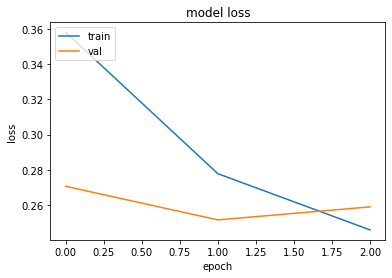

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(3),history.history['loss'])
plt.plot(np.arange(3),history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

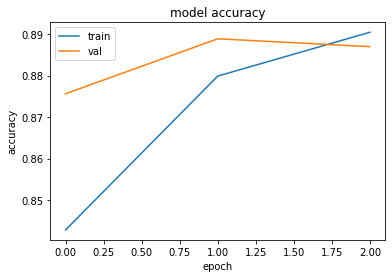

In [ ]:
 
plt.legend(['train', 'val'], loc='upper left')
plt.show()